# Importing required libraries and data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv')
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [12]:
df.shape

(1200, 28)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [14]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


## Getting unique values of the variables

In [15]:
for col in df:
    print(df[col].unique())

['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
[32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
['Male' 'Female']
['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
['Single' 'Married' 'Divorced']
['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
[10 14  5 16  8  1 24  3 27 19  9  2  7  6 26 11 23 13 29 12  4 25 21 18
 20 17 22 28 15]
[3 4 2 5 1]
[4 2 1 3]
[ 55  42  48  73  84  32  54  67  6

## Dropping EmpNumber column and seperating categorical and numerical variables

In [3]:
df1 = df.drop(['EmpNumber'],axis=1,inplace=True)

In [5]:
# seperating columns with categorical and numerical values
categorical, numerical = [],[]
for z in df.columns:
    t = df.dtypes[z]
    if t=='object':
        categorical.append(z)
    else:
        numerical.append(z)
print("CategoricaL are ---->",categorical,end="")
print()
print()
print("NumericaL are ---->",numerical,end="")
print()
print("total categorical features = ",len(categorical))
print('total numerical features = ',len(numerical))

CategoricaL are ----> ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']

NumericaL are ----> ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']
total categorical features =  8
total numerical features =  19


## Testing for null values

In [6]:
df.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

<AxesSubplot:>

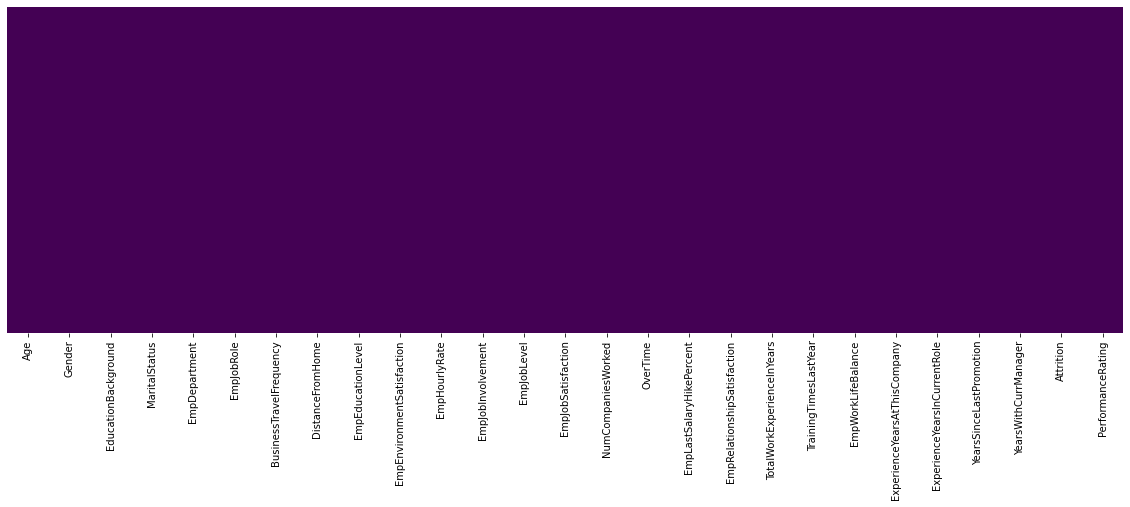

In [7]:
plt.figure(figsize=(20,6));
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

## Label encoding categorical variables

In [8]:
le = LabelEncoder()
df[categorical] = df[categorical].apply(le.fit_transform)

In [9]:
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,3,0,5,13,1,3,1,4,...,2,6,3,3,6,5,0,4,0,4
1196,37,1,1,2,1,15,2,10,2,4,...,1,4,2,3,1,0,0,0,0,3
1197,50,1,3,1,1,15,2,28,1,4,...,3,20,3,3,20,8,3,8,0,3
1198,34,0,3,2,0,1,2,9,3,4,...,2,9,3,4,8,7,7,7,0,3


## Finding outliers using boxplot

<AxesSubplot:xlabel='EmpEducationLevel'>

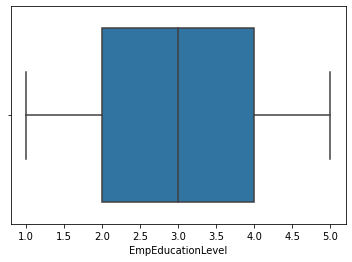

In [14]:
sns.boxplot(df.EmpEducationLevel)

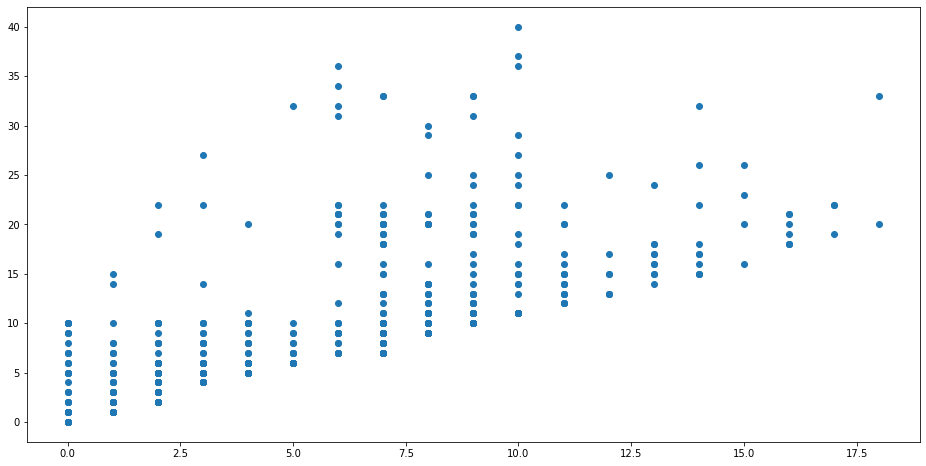

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['ExperienceYearsInCurrentRole'], df['ExperienceYearsAtThisCompany'])

<AxesSubplot:xlabel='ExperienceYearsAtThisCompany'>

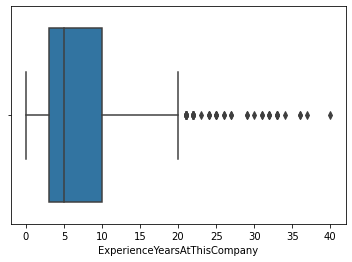

In [16]:
sns.boxplot(df.ExperienceYearsAtThisCompany)

## Removing outliers using by finding zscore

In [17]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.54145787 0.80942721 0.17945861 ... 1.10025139 0.41733475 0.09961771]
 [1.10988772 0.80942721 0.17945861 ... 0.8177735  0.41733475 0.09961771]
 [0.33925978 0.80942721 0.94311225 ... 2.23016296 0.41733475 2.02770238]
 ...
 [1.44015684 0.80942721 0.58419504 ... 1.10025139 0.41733475 0.09961771]
 [0.32127846 1.23544154 0.58419504 ... 0.8177735  0.41733475 0.09961771]
 [1.42217552 1.23544154 0.94311225 ... 1.15957175 2.39615797 1.82846697]]


In [18]:
threshold = 3
print(np.where(z > 3))

(array([   3,   25,   25,   52,   72,   77,  100,  100,  126,  137,  151,
        175,  178,  216,  252,  272,  272,  283,  283,  295,  308,  308,
        312,  316,  320,  320,  330,  342,  347,  361,  361,  387,  450,
        450,  456,  471,  475,  475,  490,  490,  528,  555,  571,  613,
        615,  615,  617,  639,  642,  655,  658,  703,  716,  730,  785,
        816,  816,  817,  818,  845,  845,  864,  864,  864,  867,  867,
        867,  888,  911,  921,  921,  946,  956,  956,  962,  962,  989,
        989,  999, 1036, 1083, 1083, 1104, 1117, 1117, 1135, 1152, 1156,
       1160], dtype=int64), array([23, 21, 24, 21, 24, 18, 21, 23, 24, 23, 22, 22, 21, 23, 23, 21, 23,
       23, 24, 18, 21, 23, 21, 23, 23, 24, 23, 18, 21, 22, 23, 23, 21, 23,
       23, 21, 18, 21, 21, 23, 18, 23, 23, 23, 18, 23, 23, 22, 23, 24, 22,
       18, 23, 22, 24, 21, 23, 22, 23, 18, 21, 22, 23, 24, 18, 21, 23, 24,
       23, 21, 22, 23, 22, 24, 21, 23, 18, 21, 22, 23, 23, 24, 21, 21, 23,
       18, 2

In [19]:
df =df[(z < 3).all(axis=1)]
df.shape

(1134, 27)

In [20]:
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3
5,27,1,1,0,1,3,1,10,2,4,...,3,9,4,2,9,7,1,7,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,3,0,5,13,1,3,1,4,...,2,6,3,3,6,5,0,4,0,4
1196,37,1,1,2,1,15,2,10,2,4,...,1,4,2,3,1,0,0,0,0,3
1197,50,1,3,1,1,15,2,28,1,4,...,3,20,3,3,20,8,3,8,0,3
1198,34,0,3,2,0,1,2,9,3,4,...,2,9,3,4,8,7,7,7,0,3


<AxesSubplot:xlabel='ExperienceYearsAtThisCompany'>

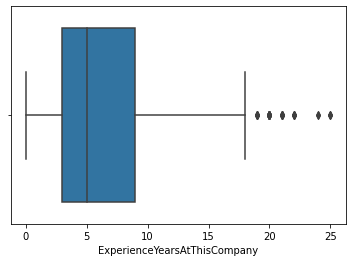

In [21]:
sns.boxplot(df.ExperienceYearsAtThisCompany)

## Making the data balanced using SMOTE Oversampling

In [22]:
df.PerformanceRating.value_counts()

3    831
2    177
4    126
Name: PerformanceRating, dtype: int64

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

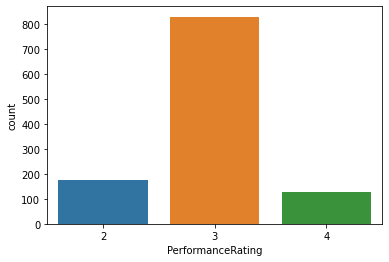

In [23]:
sns.countplot(df.PerformanceRating)

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [25]:
X = df.iloc[:,:-1]
y = df.PerformanceRating

In [26]:
X_smote,y_smote = smote.fit_sample(X,y)

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

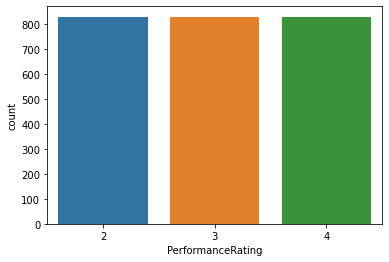

In [27]:
sns.countplot(y_smote)

In [28]:
X_smote.shape

(2493, 26)

In [29]:
X_smote.to_csv (r'C:\Users\Admin\Datamites\IABAC_Proj.csv', index = False)
y_smote.to_csv (r'C:\Users\Admin\Datamites\IABAC_Proj1.csv', index = False)

## Saved the balanced data for applying Machine learning models